# Tidal Report

In [75]:
# imported data into jupyter notebook. can now access data inside
# rename file to : ASTR19_project_data.txt
data = open('ASTR19_project_data.txt','r')

read_data = data.readlines()

read_data

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [76]:
import numpy as np

data = np.loadtxt("ASTR19_project_data.txt", dtype=str, comments="#")
data[:5]


C:\Users\Jimmy\AppData\Local\Temp\ipykernel_38088\2933268356.py:3: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt("ASTR19_project_data.txt", dtype=str, comments="#")


array([['1', '8:07', '6.57'],
       ['1', '15:37', '-0.39'],
       ['2', '8:55', '5.38'],
       ['2', '16:25', '-1.74'],
       ['3', '9:45', '5.26']], dtype='<U5')

In [77]:
day = data[:,0].astype(float)
time_str = data[:,1]
height = data[:,2].astype(float)


In [78]:
def to_hours(t):
    h, m = t.split(":")
    return int(h) + int(m)/60

hours = np.array([to_hours(t) for t in time_str])


In [79]:
x = day + hours/24
h = height
#create a linespace that has 1000 points between x range
t = np.linspace(0,43,1000)
print("t[:5] =", t[:5])
print("h[:5] =", h[:5])

t[:5] = [0.         0.04304304 0.08608609 0.12912913 0.17217217]
h[:5] = [ 6.57 -0.39  5.38 -1.74  5.26]


In [89]:
from scipy import optimize
import matplotlib.pyplot as plt

a = (max(height) - min(height)) / 2
i = np.mean(h)

def oscillatory_fnc(t, a, b, c, g, d, i):
    return i + a * (np.cos(b*t+c)) * np.cos(g*t+d)
    
#curve fit the function
params, params_cov = optimize.curve_fit(oscillatory_fnc, x, h, p0=[a, 1.5, 0, 1.2, 0, i])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
g_fit = params[3]
d_fit = params[4]
i_fit = params[5]

# print them in one line (slide style)
print(a_fit, b_fit, c_fit, g_fit, d_fit, i_fit)

y_fit = i_fit+1 + a_fit-4 * (np.cos(b_fit*t+c_fit)) * np.cos(g_fit*t+d_fit)

#Compute residuals
y_fit_data = oscillatory_fnc(x, a_fit, b_fit, c_fit, g_fit, d_fit, i_fit)
residuals = h - y_fit_data

-1.0836120104349287 1.5596092650851547 -1.5102779546076184 1.127089054042749 0.9051475880049664 2.495311983925078


In [93]:
#print(len(t))
#print(oscillatory_fnc(t, a, b, c, g, d, i))

1000


NameError: name 'c' is not defined

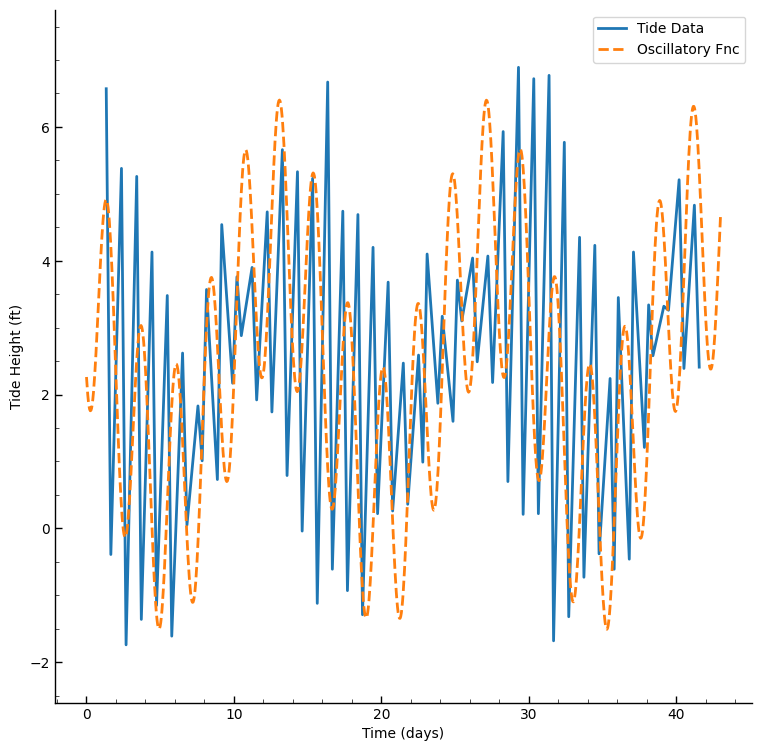

In [91]:
plt.style.use("./astr19_matplotlib_defaults.txt")

plt.figure(figsize=(9,9))

# Raw data
plt.plot(x, h, label="Tide Data")

# Simple oscillatory graph
plt.plot(t, y_fit, label="Oscillatory Fnc", linestyle="--")
plt.xlabel("Time (days)")
plt.ylabel("Tide Height (ft)")
plt.legend()
plt.show()

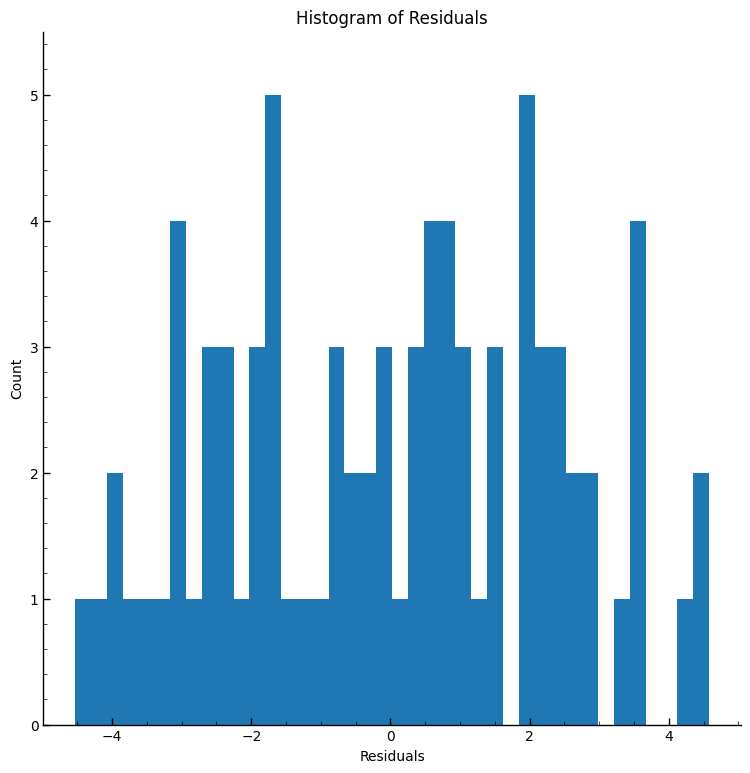

In [92]:
#plot the residuals
plt.figure(figsize=(9,9))
plt.hist(residuals, bins=40)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Histogram of Residuals")
plt.show()